## Glass Identification

#### Problem Statement
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Importing Dataset

In [2]:
#Importing data set
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


We can see in the above dataset the columns are in numerical type which will make it difficult to identify later. Let's rename the columns.

In [3]:
df.rename(columns = {'1':'Id number',
                    '1.52101':'RI',
                    '13.64':'Na',
                    '4.49':'Mg',
                    '1.10':'Al',
                    '71.78':'Si',
                    '0.06':'K',
                    '8.75':'Ca',
                    '0.00':'Ba',
                    '0.00.1':'Fe',
                    '1.1':'Type of glass'}, inplace = True)

In [4]:
#Let's review our renamed dataset
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


Our dataset is successfully renamed. Now we can move ahead.

#### Attribute Information

1.Id number: 1 to 214

2.RI: refractive index

3.Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

4Mg: Magnesium

5.Al: Aluminum

6.Si: Silicon

7.K: Potassium

8.Ca: Calcium

9.Ba: Barium

10.Fe: Iron

11.Type of glass: (class attribute)

•	1- building_windows_float_processed

•	2- building_windows_non_float_processed

•	3- vehicle_windows_float_processed

•	4- vehicle_windows_non_float_processed (none in this database)

•	5- containers

•	6- tableware

•	7- headlamps



#### To predict: 
Type of Glass 

Here Id number is basically the serial number so we don't need it anyway. Let's just drop it. 

In [5]:
df.drop('Id number',axis=1,inplace=True)

In [6]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


#### Exploratory Data Analysis (EDA)

In [7]:
#Checking for shape
df.shape

(213, 10)

We can see our dataset contains 213 rows and 10 columns, out of which 1 column is our target column and the rest are features.

In [8]:
#Checking for missing values
df.isna().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

We can see there are no missing values as of now. Let's move forward.

In [9]:
#Checking for unique values 
df.nunique()

RI               177
Na               142
Mg                93
Al               117
Si               132
K                 65
Ca               143
Ba                34
Fe                32
Type of glass      6
dtype: int64

We can see the unique values in our dataset.

In [10]:
#Checking the value count for each column to check if there are any missing values or white spaces
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 177, dtype: int64


13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.46     1
3.73     1
3.97     1
3.89     1
1.78     1
Name: Mg, Length: 93, dtype: int64


1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: Al, Length: 117, dtype: int64


72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: Si, Length: 132, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


8.03    5
8.43    5
8.44    4
9.57    

We can see there are no missing values as well as white spaces present in our dataset. Great! Let's move ahead.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             213 non-null    float64
 1   Na             213 non-null    float64
 2   Mg             213 non-null    float64
 3   Al             213 non-null    float64
 4   Si             213 non-null    float64
 5   K              213 non-null    float64
 6   Ca             213 non-null    float64
 7   Ba             213 non-null    float64
 8   Fe             213 non-null    float64
 9   Type of glass  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


It gives the information about the row count, column count, column names, data types, non-null count and memory usage.

In [12]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


It gives the statistical information about the dataset about no. of count, mean values, standard deviation, min values, 25% quantile, 50% and 75% quantile and max values in the dataset.

#### Checking for Correlation

In [13]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
Na,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Mg,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Al,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Si,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
K,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Ca,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Ba,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Fe,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090
Type of glass,-0.161322,0.504983,-0.744004,0.597754,0.147767,-0.012765,0.000372,0.574896,-0.191090,1.000000


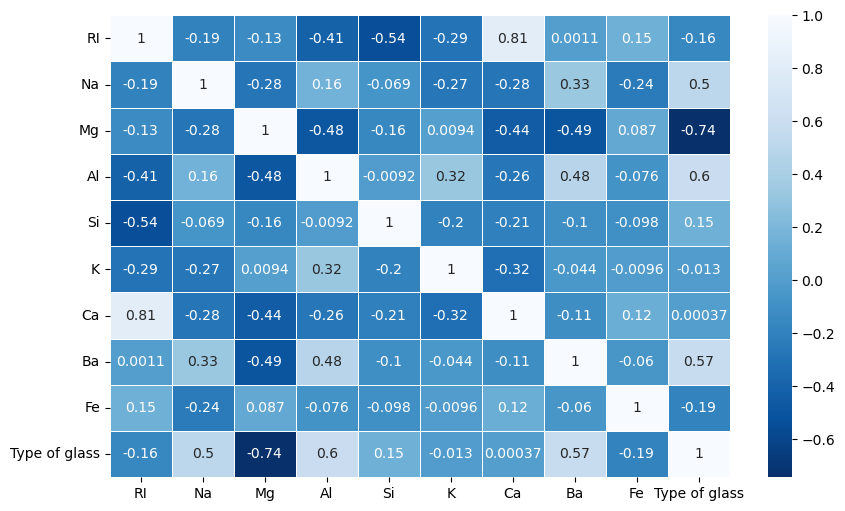

In [14]:
#Let's plot a heatmap for visualizing the correlation between features and label
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, cmap='Blues_r')
plt.show()

Here we can see Barium has 57% positive correlation with Type of glass where as Silicon has only 15% positive correlation.

#### Data Visualization

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


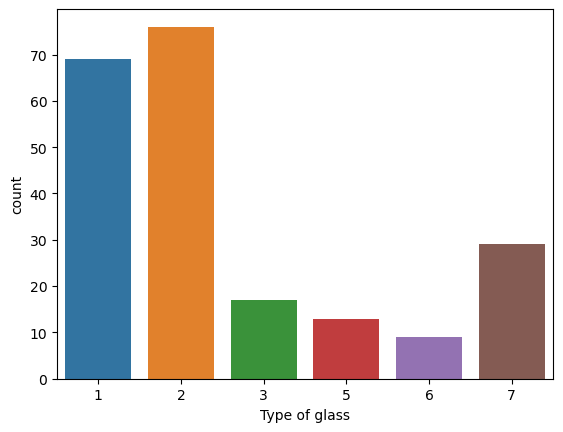

In [15]:
#Visualizing Type of glass
ax = sns.countplot(x='Type of glass', data=df)
print(df['Type of glass'].value_counts())
plt.show()

Here we can see that type 1 & 2 glasses are more in number followed by type 7. Type 1 & 2 for windows and type 7 for headlamps.

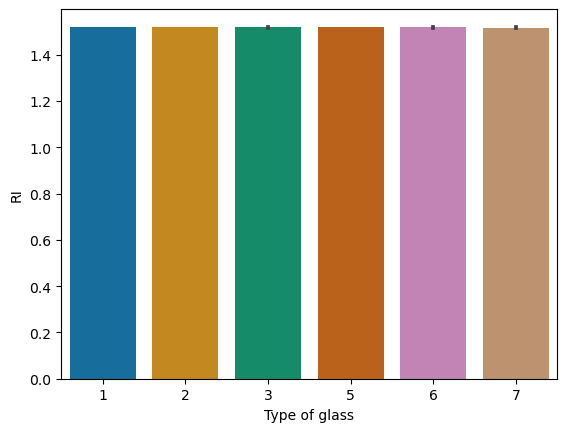

In [19]:
#Comparing RI with Type of glass
sns.barplot(x='Type of glass', y='RI', data=df, palette='colorblind') 
plt.show()

We can see that type 5 has more RI w.r.t others.

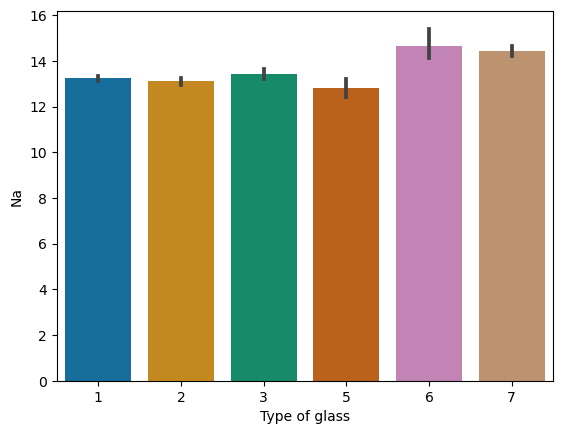

In [20]:
#Comparing Na with Type of glass
sns.barplot(x='Type of glass', y='Na', data=df, palette='colorblind')
plt.show()

Here, type 6 & 7 contain more amount of Na as compared to others.

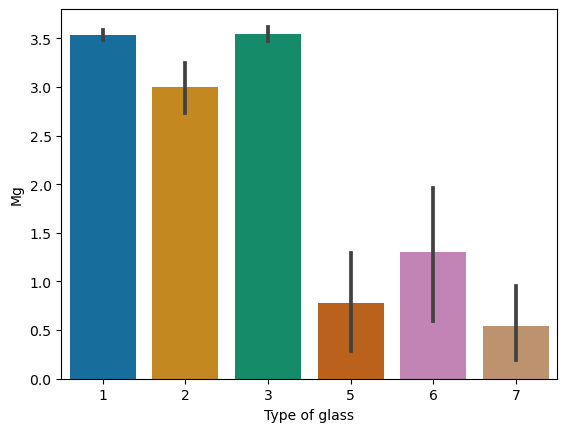

In [21]:
#Comparing Mg with Type of glass
sns.barplot(x='Type of glass', y='Mg', data=df, palette='colorblind')
plt.show()

Here, we can see that type 1 & 3 contain more amount of Mg followed by type 2.

<Axes: xlabel='Type of glass', ylabel='Al'>

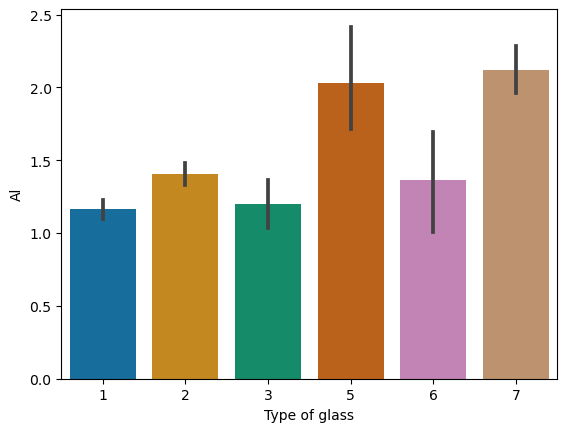

In [22]:
#Comparing Al with Type of glass
sns.barplot(x='Type of glass', y='Al', data=df, palette='colorblind')

Here, we can see that type 5 & type 7 contain more Aluminium than others.

<Axes: xlabel='Type of glass', ylabel='Si'>

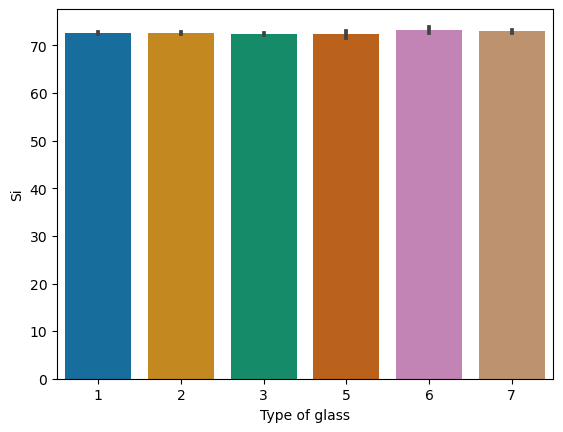

In [23]:
#Comparing Si with Type of glass
sns.barplot(x='Type of glass', y='Si', data=df, palette='colorblind')

We can see that silicon is relatively equally distributed with every type.

<Axes: xlabel='Type of glass', ylabel='K'>

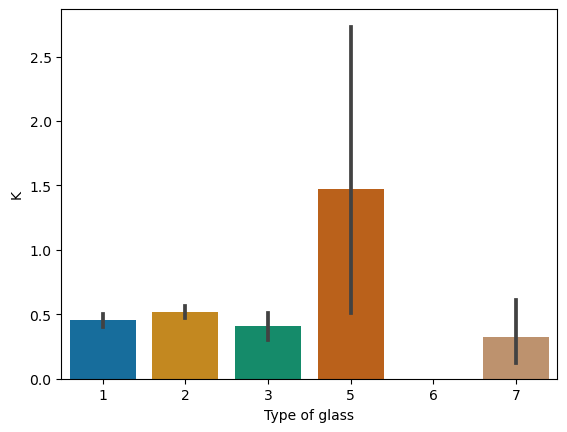

In [24]:
#Comparing K with Type of glass
sns.barplot(x='Type of glass', y='K', data=df, palette='colorblind')

Here, we can see that the glasses contains very least amount of Potassium and type 5 contains more among others.

<Axes: xlabel='Type of glass', ylabel='Ca'>

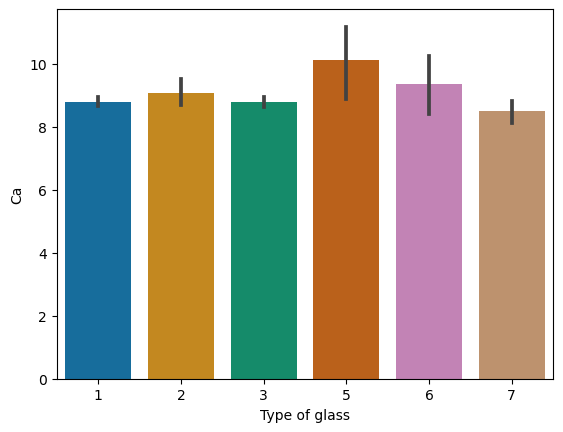

In [25]:
#Comparing Ca with Type of glass
sns.barplot(x='Type of glass', y='Ca', data=df, palette='colorblind')

Here, we can see that type 5 contains more amount of Calcium than others followed by type 6.

<Axes: xlabel='Type of glass', ylabel='Ba'>

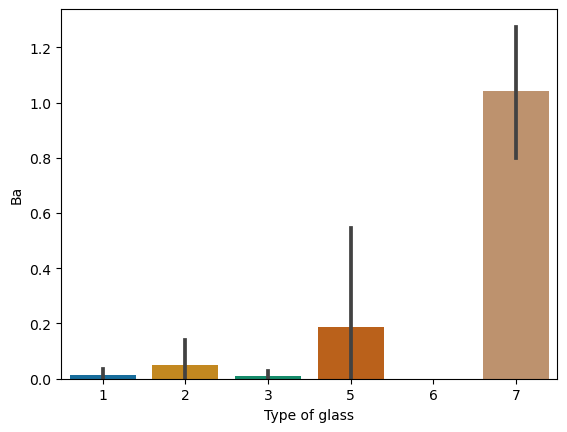

In [29]:
#Comparing Ba with Type of glass
sns.barplot(x='Type of glass', y='Ba', data=df, palette='colorblind')

Here, we can see that only type 7 contains Barium.

<Axes: xlabel='Type of glass', ylabel='Fe'>

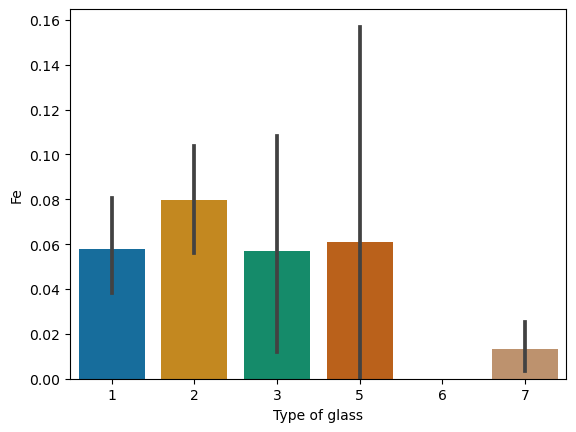

In [31]:
#Comparing Fe with Type of glass
sns.barplot(x='Type of glass', y='Fe', data=df, palette='colorblind')

Here, we can see that type 1, 2 & 3 contain Iron w.r.t. others.

#### Checking for Outliers

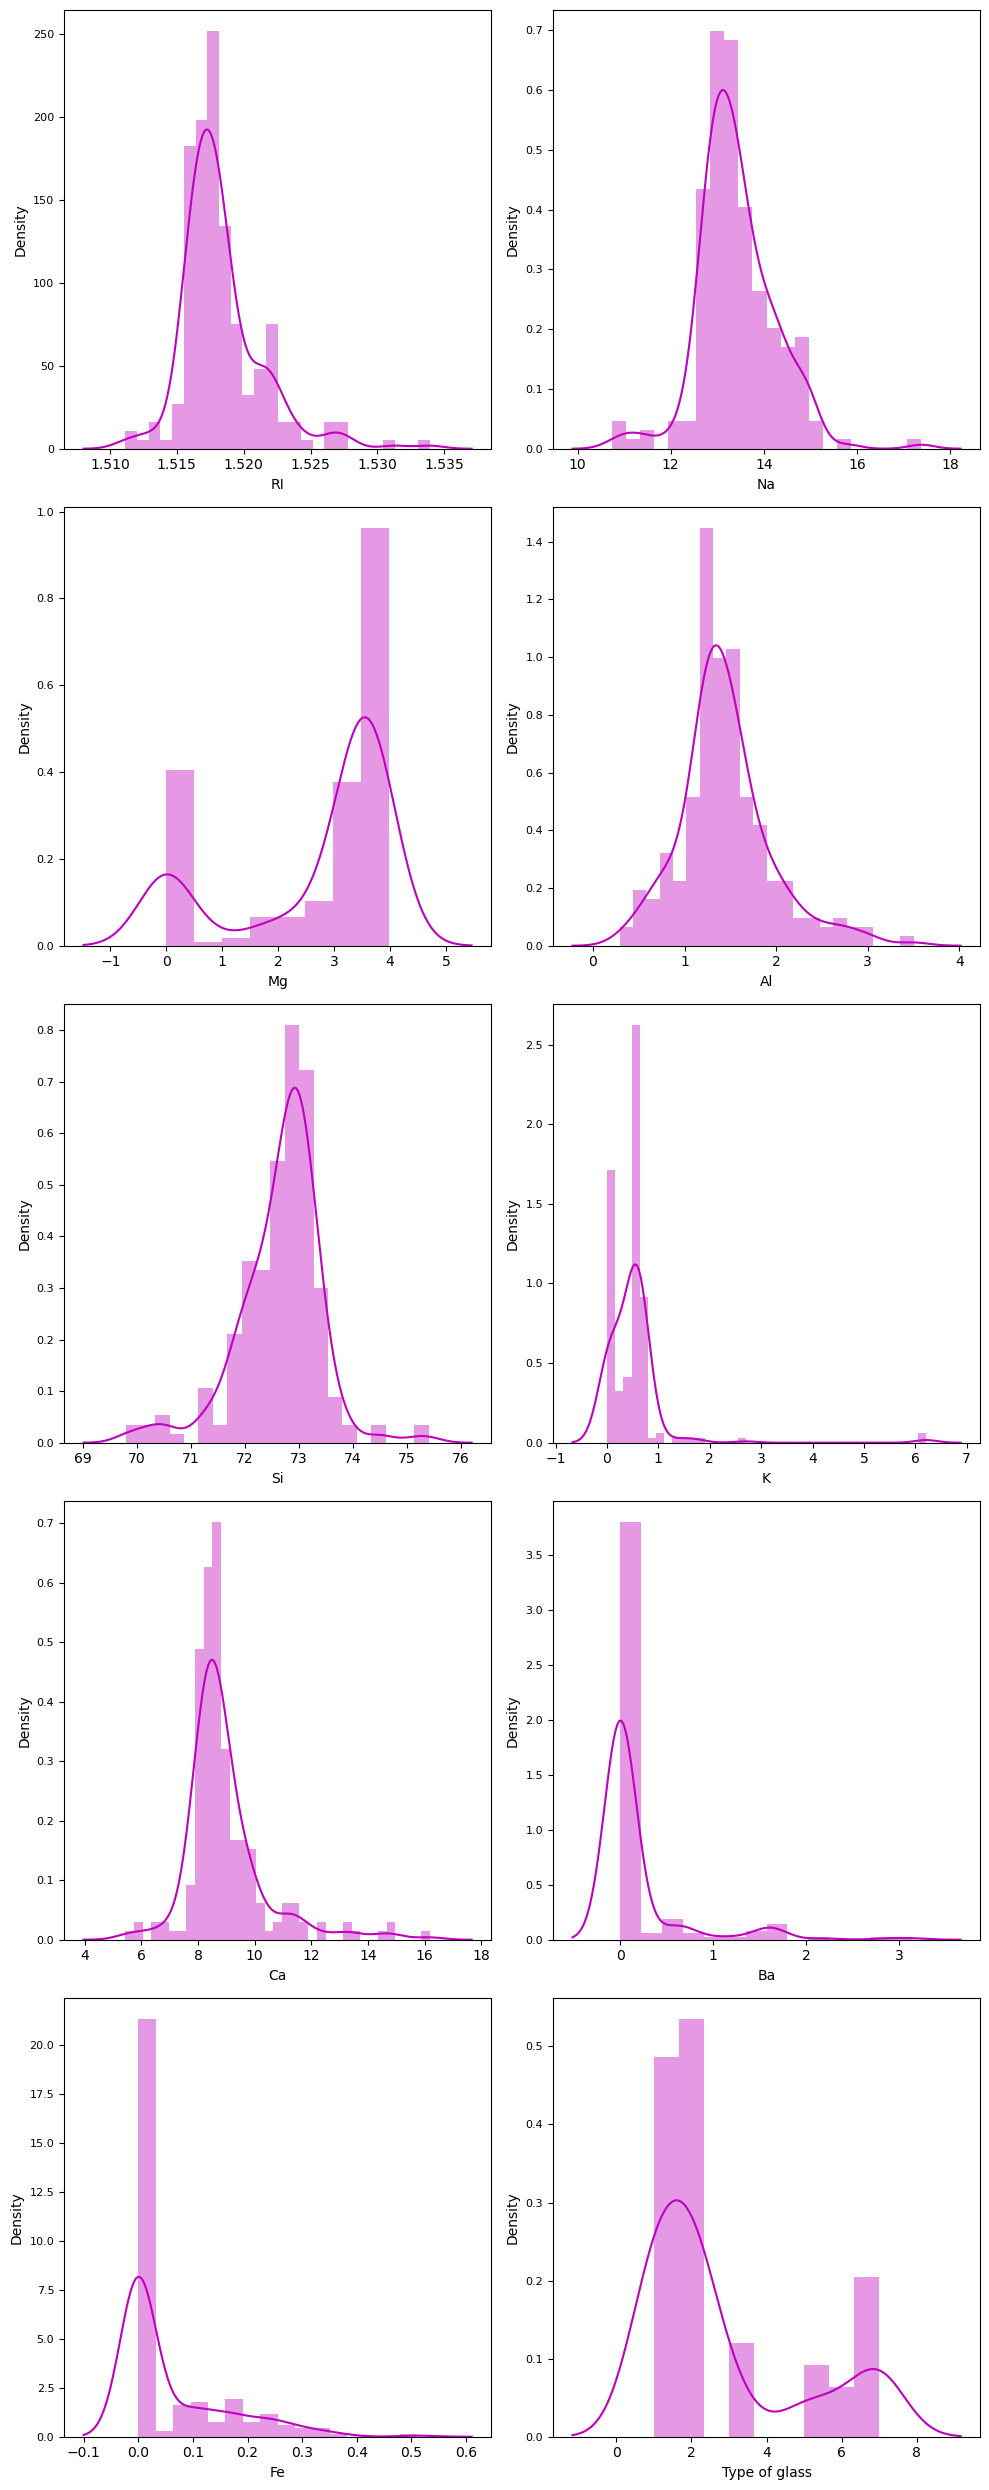

In [7]:
#Visualizing data using dist plot
plt.figure(figsize= (10,25), facecolor='white')
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax = plt.subplot(5,2, plotnumber)
        sns.distplot(df[col], color = "m")
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation=0, fontsize=8)
    plotnumber+=1
    plt.tight_layout()

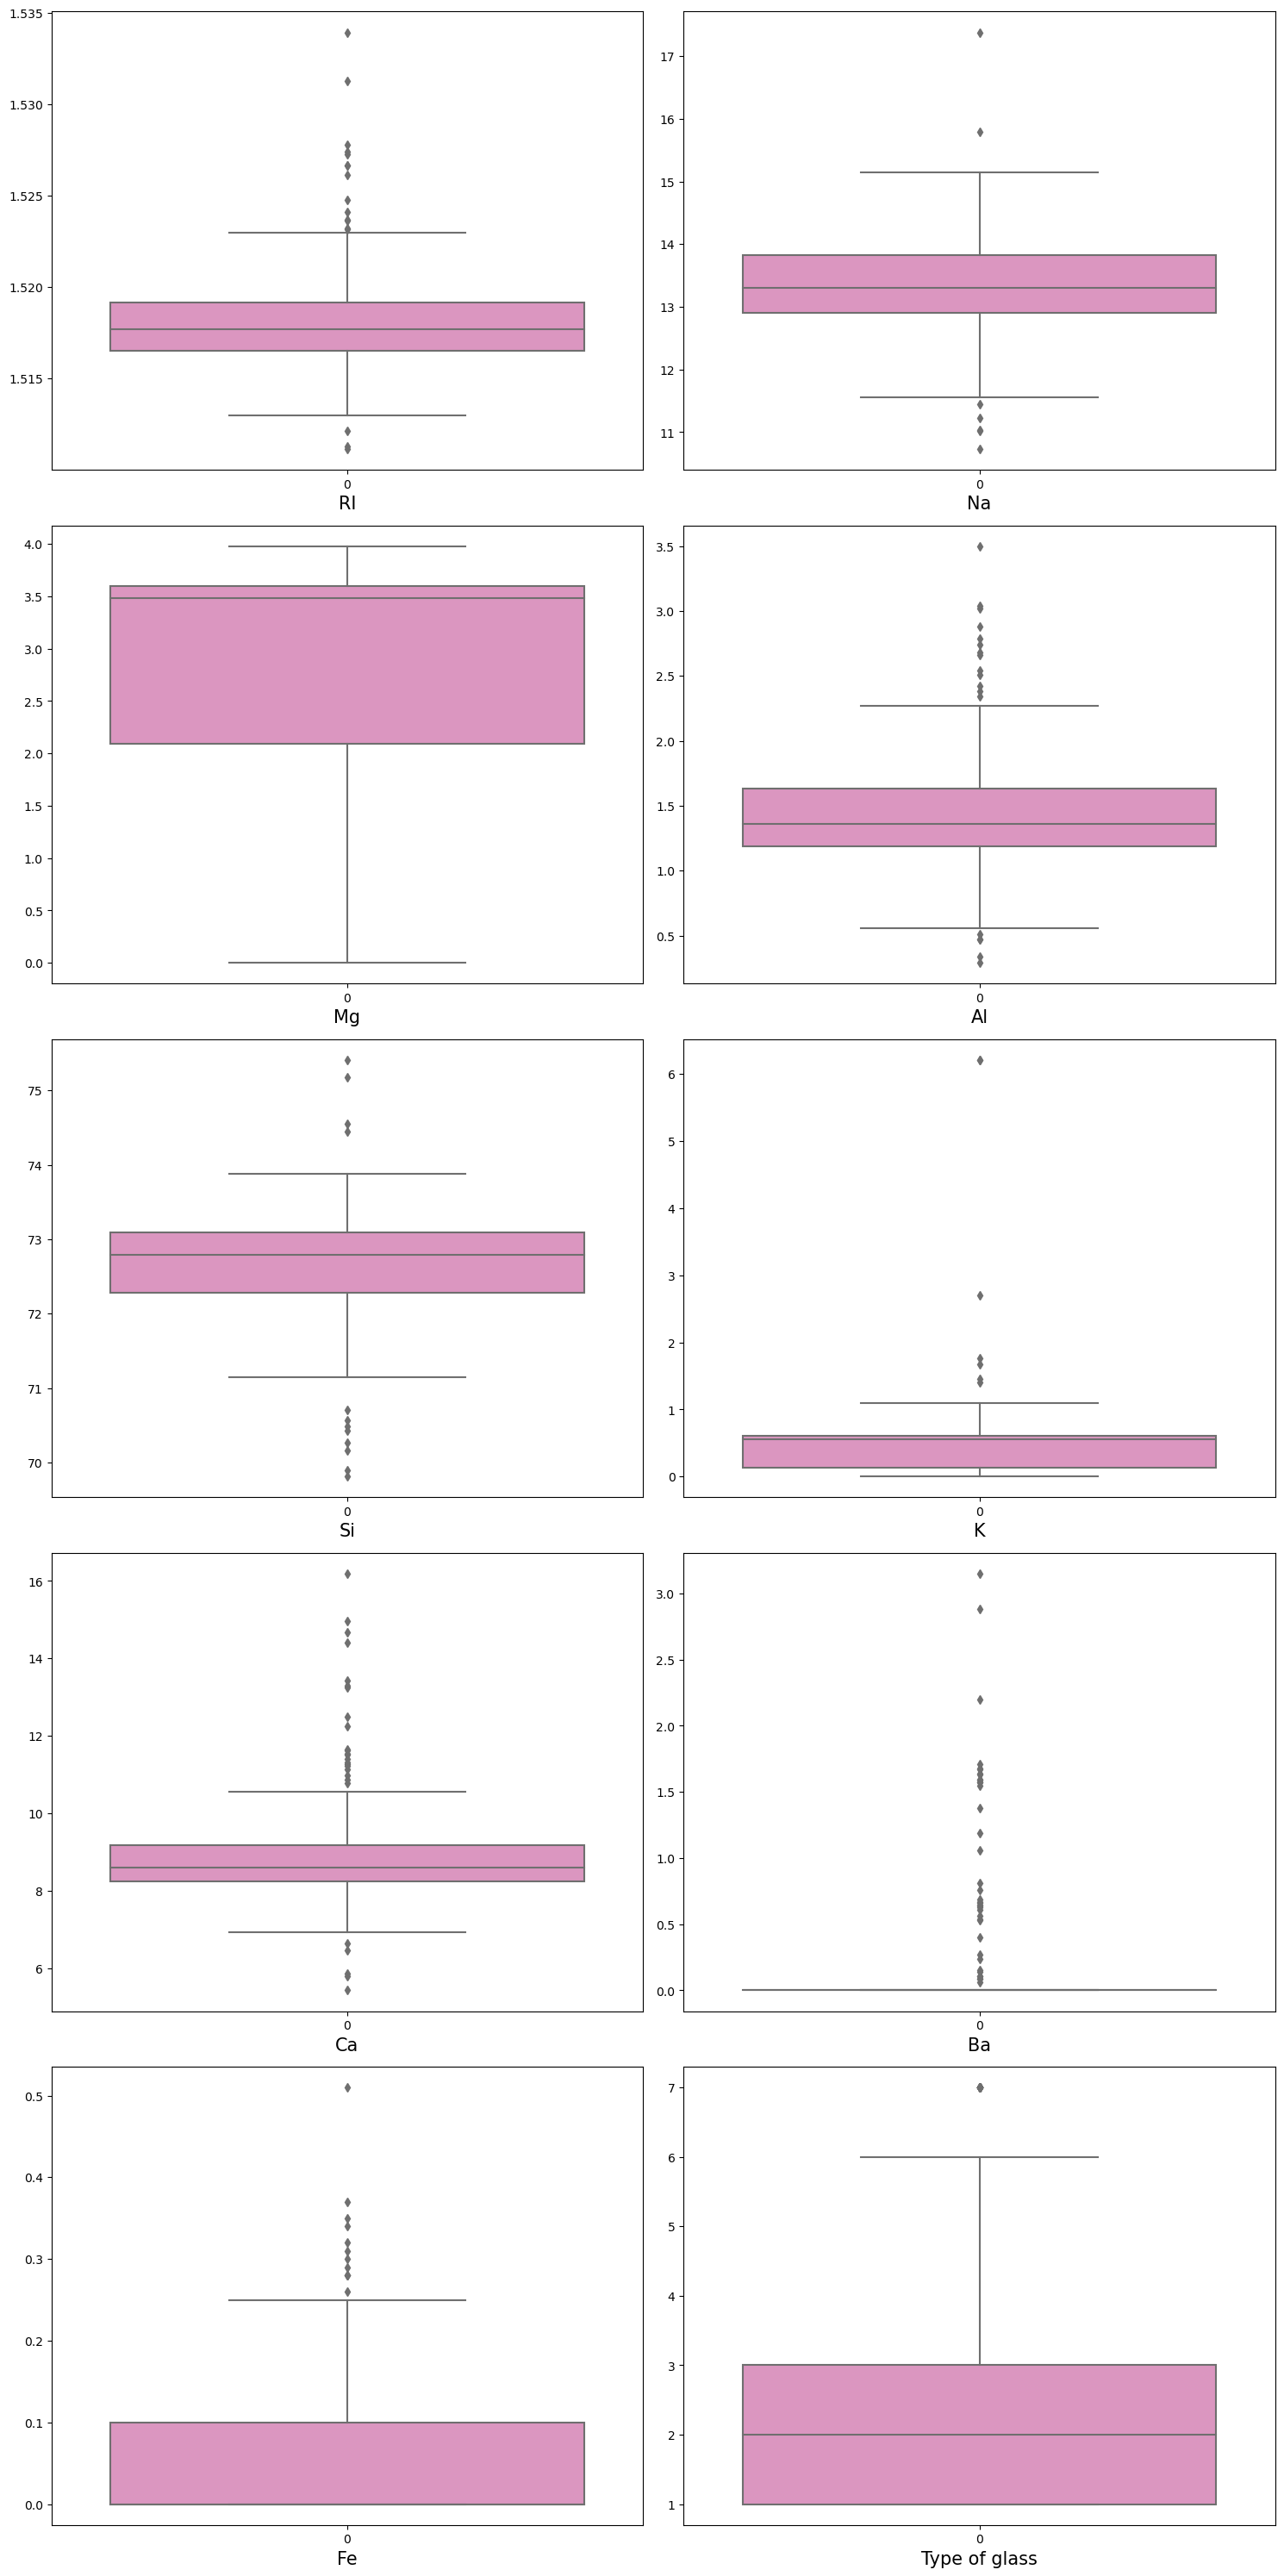

In [8]:
#Checking for outliers by box plot
plt.figure(figsize= (15, 30), facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()    

We can see there are alot of outliers in K, Ca, Ba and Fe. Let's deal with them.

#### Checking for skewness

In [7]:
df.skew()

RI               1.639658
Na               0.457318
Mg              -1.154323
Al               0.900017
Si              -0.744546
K                6.549276
Ca               2.040591
Ba               3.406749
Fe               1.747173
Type of glass    1.108861
dtype: float64

We can see there are alot of skewness in our dataset, let's just remove it.

In [8]:
#Removing skewness using transformation methods
df['RI'] = np.cbrt(df['RI'])

df['Al'] = np.cbrt(df['Al'])

df['K'] = np.cbrt(df['K'])

df['Ca'] = np.log(df['Ca'])

df['Ba'] = np.cbrt(df['Ba'])

df['Fe'] = np.cbrt(df['Fe'])

df['Type of glass'] = np.cbrt(df['Type of glass'])

We have removed skewness from those columns. Let's check.

In [9]:
df.skew()

RI               1.631276
Na               0.457318
Mg              -1.154323
Al              -0.212025
Si              -0.744546
K               -0.602542
Ca               1.062738
Ba               2.065220
Fe               0.887382
Type of glass    0.714229
dtype: float64

In [10]:
#Removing skewness from target variable
df['Type of glass'] = np.cbrt(df['Type of glass'])

In [11]:
df['RI'] = np.cbrt(df['RI'])
df['Ca'] = np.cbrt(df['Ca'])
df['Ba'] = np.cbrt(df['Ba'])
df['Fe'] = np.cbrt(df['Fe'])

In [12]:
df.skew()

RI               1.628486
Na               0.457318
Mg              -1.154323
Al              -0.212025
Si              -0.744546
K               -0.602542
Ca               0.736782
Ba               1.748815
Fe               0.755148
Type of glass    0.548898
dtype: float64

Now our data looks good, let's move ahead.

#### Z-Score

In [13]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z.shape

(213, 10)

In [14]:
threshold = 3
print(np.where(z>3))

(array([ 20, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111, 162, 162,
       162, 170, 171, 183, 183, 183, 184, 185, 187, 200], dtype=int64), array([3, 0, 1, 4, 0, 4, 6, 6, 6, 0, 6, 3, 4, 6, 5, 5, 1, 3, 4, 6, 6, 4,
       4], dtype=int64))


#### Separating Features and Label

In [15]:
x = df.drop("Type of glass", axis=1)
y = df["Type of glass"]

#### Feature Scaling using Standard Scaler

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.244619,0.591880,0.642937,-0.060224,0.097091,0.342041,-0.867806,-0.462443,-0.697338
1,-0.717425,0.150946,0.608144,0.296823,0.433777,0.184051,-0.914871,-0.462443,-0.697338
2,-0.228095,-0.240996,0.705564,-0.207590,-0.058303,0.481328,-0.513830,-0.462443,-0.697338
3,-0.307417,-0.167507,0.656854,-0.316148,0.550322,0.451717,-0.647299,-0.462443,-0.697338
4,-0.790200,-0.755419,0.649895,0.446593,0.407878,0.579815,-0.647299,-0.462443,1.555639
...,...,...,...,...,...,...,...,...,...
208,-0.700887,0.898085,-1.862164,2.338124,-0.058303,-0.720352,0.270773,2.257625,-0.697338
209,-0.495852,1.853443,-1.862164,1.081611,0.524423,-2.020518,-0.357838,2.382971,-0.697338
210,0.759193,1.167545,-1.862164,1.129522,0.990604,-2.020518,-0.323769,2.392777,-0.697338
211,-0.608281,1.192041,-1.862164,1.000677,1.236644,-2.020518,-0.289911,2.378972,-0.697338


We have scaled our data to remove biasness.

#### Checking for VIF

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

vif

,VIF values,Features
0,7.061349,RI
1,3.969234,Na
2,4.452290,Mg
3,3.089279,Al
4,3.589829,Si
5,3.749456,K
6,7.845554,Ca
7,2.582034,Ba
8,1.101162,Fe


As we can see the VIF values are <10 we can proceed further.

In [18]:
y.value_counts()

1.080060    76
1.000000    69
1.241366    29
1.129831    17
1.195813    13
1.220285     9
Name: Type of glass, dtype: int64

In [19]:
y.shape

(213,)

#### Model Training

Since our data contains continuous data, it will create problem if we don't deal with it. Let's use Label Encoder to encode it.

In [20]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()

df['Type of glass'] = lab.fit_transform(df['Type of glass'])

In [21]:
#Let's check
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.047439,13.89,3.60,1.107932,72.73,0.782974,1.271977,0.0,0.000000,0
1,1.047330,13.53,3.55,1.154800,72.99,0.730614,1.270655,0.0,0.000000,0
2,1.047443,13.21,3.69,1.088587,72.61,0.829134,1.281913,0.0,0.000000,0
3,1.047425,13.27,3.62,1.074337,73.08,0.819321,1.278167,0.0,0.000000,0
4,1.047313,12.79,3.61,1.174460,72.97,0.861774,1.278167,0.0,0.860988,0


In [22]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
208,1.047334,14.14,0.0,1.422757,72.61,0.430887,1.303938,1.006495,0.0,5
209,1.047381,14.92,0.0,1.257818,73.06,0.000000,1.286292,1.052877,0.0,5
210,1.047672,14.36,0.0,1.264107,73.42,0.000000,1.287249,1.056505,0.0,5
211,1.047355,14.38,0.0,1.247194,73.61,0.000000,1.288199,1.051397,0.0,5
212,1.047401,14.23,0.0,1.276501,73.36,0.000000,1.291480,1.058635,0.0,5


We have successfully converted our data. Let's move forward.

#### Creating Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=41)

In [25]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
137,1.047373,12.79,3.52,1.154800,73.36,0.870659,1.273808,0.000000,0.000000
55,1.047020,12.99,3.47,1.038499,72.98,0.852702,1.285088,0.000000,0.877980
90,1.047320,12.90,3.44,1.131851,73.06,0.760590,1.283142,0.000000,0.000000
112,1.047540,13.46,3.83,1.080082,72.55,0.829134,1.281666,0.000000,0.803758
199,1.047245,15.15,0.00,1.310371,73.50,0.000000,1.284846,0.949958,0.000000
...,...,...,...,...,...,...,...,...,...
65,1.047739,13.05,3.65,0.954640,72.22,0.574890,1.317605,0.000000,0.821286
80,1.047311,13.25,3.45,1.126623,73.17,0.848093,1.272764,0.000000,0.000000
140,1.047508,13.20,3.63,1.022809,72.83,0.829134,1.286532,0.765252,0.821286
163,1.047557,12.73,1.85,1.229809,72.69,0.843433,1.322211,0.000000,0.000000


In [26]:
y_train

137    1.080060
55     1.000000
90     1.080060
112    1.080060
199    1.241366
         ...   
65     1.000000
80     1.080060
140    1.080060
163    1.195813
192    1.241366
Name: Type of glass, Length: 159, dtype: float64

#### Data Modelling

In [27]:
#Importing necessary libraries
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.svm import SVR

##### Linear Regression

In [28]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_LR))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2 Score: 0.6960442650117642
R2 Score on training data: 64.54203652865888
Mean Absolute Error: 0.03888740995441694
Mean Squared Error: 0.002113608078732792
Root Mean Squared Error: 0.04597399350429318


In [29]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_RFR))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 Score: 0.6994550967866469
R2 Score on training data: 95.49334745425536
Mean Absolute Error: 0.03453380202517063
Mean Squared Error: 0.0020898902778665918
Root Mean Squared Error: 0.04571531775965898


In [30]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
pred_DT = DT.predict(x_test)
pred_train = DT.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_DT))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_DT))
print('Mean Squared Error:', mean_squared_error(y_test, pred_DT))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_DT)))

R2 Score: 0.5904253922361202
R2 Score on training data: 100.0
Mean Absolute Error: 0.02913162293317333
Mean Squared Error: 0.0028480469363312256
Root Mean Squared Error: 0.05336709600803875


In [33]:
KN = KNeighborsRegressor()
KN.fit(x_train, y_train)
pred_KN = KN.predict(x_test)
pred_train = KN.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_KN))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_KN))
print('Mean Squared Error:', mean_squared_error(y_test, pred_KN))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_KN)))

R2 Score: 0.6548081016895266
R2 Score on training data: 70.2961870354319
Mean Absolute Error: 0.039181087980194776
Mean Squared Error: 0.0024003507780840623
Root Mean Squared Error: 0.04899337483868673


In [34]:
LS = Lasso()
LS.fit(x_train, y_train)
pred_LS = LS.predict(x_test)
pred_train = LS.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_LS))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LS))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LS))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_LS)))

R2 Score: -0.03545558491454304
R2 Score on training data: 0.0
Mean Absolute Error: 0.07107893122701135
Mean Squared Error: 0.007200217128750907
Root Mean Squared Error: 0.08485409317617451


In [35]:
RD = Ridge()
RD.fit(x_train, y_train)
pred_RD = RD.predict(x_test)
pred_train = RD.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_RD))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RD))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RD))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_RD)))

R2 Score: 0.6899328852880733
R2 Score on training data: 63.5326951627707
Mean Absolute Error: 0.04058157797130518
Mean Squared Error: 0.0021561046006579225
Root Mean Squared Error: 0.046433873418636126


In [36]:
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)
pred_GB = GB.predict(x_test)
pred_train = GB.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_GB))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GB))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GB))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_GB)))

R2 Score: 0.5860236168953195
R2 Score on training data: 98.28911300097528
Mean Absolute Error: 0.039362230613282846
Mean Squared Error: 0.0028786554324053116
Root Mean Squared Error: 0.05365310272859634


In [37]:
ET = ExtraTreesRegressor()
ET.fit(x_train, y_train)
pred_ET = ET.predict(x_test)
pred_train = ET.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_ET))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ET))
print('Mean Squared Error:', mean_squared_error(y_test, pred_ET))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_ET)))

R2 Score: 0.7077624243854367
R2 Score on training data: 100.0
Mean Absolute Error: 0.03325420477316481
Mean Squared Error: 0.002032123857614111
Root Mean Squared Error: 0.045079084480655895


In [38]:
SV = SVR()
SV.fit(x_train, y_train)
pred_SV = SV.predict(x_test)
pred_train = SV.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_SV))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_SV))
print('Mean Squared Error:', mean_squared_error(y_test, pred_SV))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_SV)))

R2 Score: 0.16468550347042243
R2 Score on training data: 22.402707292704783
Mean Absolute Error: 0.0665831889681205
Mean Squared Error: 0.005808501913003426
Root Mean Squared Error: 0.07621352841197832


Here, we can see that our Extra Trees Regressor works better with 70% R2 score.

### Cross Validation Score

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
#Linear Regression
score = cross_val_score(LR, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_LR) - score.mean())*100)

[ 0.00000000e+00 -4.34282420e-01 -5.14013392e+28 -2.34524828e+00
 -4.43392291e+01]
-1.028026783424766e+28
Difference between R2 score and cross validation score is: 1.028026783424766e+30


In [33]:
#Random Forest
score = cross_val_score(RFR, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_RFR) - score.mean())*100)

[ 0.00000000e+00 -1.70515131e+00 -5.79540224e+28 -1.46331720e+00
 -5.14016516e+01]
-1.159080448224908e+28
Difference between R2 score and cross validation score is: 1.1590804482249079e+30


In [34]:
#Decision Tree
score = cross_val_score(DT, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_DT) - score.mean())*100)

[ 0.00000000e+00 -1.42716568e+00 -1.26890692e+29 -2.92910206e+00
 -5.19913448e+01]
-2.537813833507563e+28
Difference between R2 score and cross validation score is: 2.537813833507563e+30


In [43]:
#KNeighbors
score = cross_val_score(KN, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_KN) - score.mean())*100)

[ 0.00000000e+00 -1.78924819e+00 -8.66179312e+28 -2.75091625e+00
 -6.82227908e+01]
-1.7323586239478841e+28
Difference between R2 score and cross validation score is: 1.732358623947884e+30


In [44]:
#Lasso
score = cross_val_score(LS, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_LS) - score.mean())*100)

[ 0.00000000e+00 -3.86230852e+00 -5.37206949e+27 -8.55140817e-01
 -1.40730982e+02]
-1.074413897776282e+27
Difference between R2 score and cross validation score is: 1.074413897776282e+29


In [45]:
#Ridge
score = cross_val_score(RD, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_RD) - score.mean())*100)

[ 0.00000000e+00 -5.80352969e-01 -5.53223103e+28 -1.85819991e+00
 -4.87025051e+01]
-1.1064462066997541e+28
Difference between R2 score and cross validation score is: 1.1064462066997541e+30


In [46]:
#Gradient Boosting
score = cross_val_score(GB, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_GB) - score.mean())*100)

[ 0.00000000e+00 -1.83329098e+00 -9.86905293e+28 -1.74111620e+00
 -4.95171506e+01]
-1.9738105864290005e+28
Difference between R2 score and cross validation score is: 1.9738105864290004e+30


In [47]:
#Extra Trees
score = cross_val_score(ET, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_ET) - score.mean())*100)

[ 0.00000000e+00 -2.24078718e+00 -5.03056799e+28 -1.58839803e+00
 -5.50910858e+01]
-1.0061135982683092e+28
Difference between R2 score and cross validation score is: 1.0061135982683092e+30


In [48]:
#SVM
score = cross_val_score(SV, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_SV) - score.mean())*100)

[ 0.00000000e+00 -3.12199444e+00 -1.82399027e+28  7.49960854e-02
 -8.44945300e+01]
-3.6479805383997777e+27
Difference between R2 score and cross validation score is: 3.647980538399777e+29


We can see Extra Trees Regressor has the least difference between R2 score and cross validation. Let's perform Hyper parameter tuning to increase the score.

### Hyper parameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
parameters = {'n_estimators': [50,100,200],
             'criterion' : ['squared_error', 'absolute_error'],
             'max_depth' : [0,1,2],
             'min_samples_split': [0,1,2],
             'min_samples_leaf': [0,1,2]}

In [53]:
GCV = GridSearchCV(ExtraTreesRegressor(), parameters, cv=5)

In [54]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [0, 1, 2], 'min_samples_leaf': [0, 1, 2],
                         'min_samples_split': [0, 1, 2],
                         'n_estimators': [50, 100, 200]})

In [55]:
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [57]:
final_scores = ExtraTreesRegressor(criterion = 'squared_error',
                                 max_depth = 2,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  n_estimators = 50).fit(x_train, y_train)
final_scores.score(x_test, y_test)

0.6291297189257401

In [58]:
pred = final_scores.predict(x_test)
print('R2 score:', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.6291297189257401
Mean Absolute Error: 0.04507833939053939
Mean Squared Error: 0.0025789097951081463
Root Mean Squared Error: 0.05078296756894132


So, after hyper parameter tuning we got 62% scores only.

#### Saving the model

In [59]:
import pickle

In [60]:
filename = 'Glass_identification.pkl'
pickle.dump(final_scores, open(filename, 'wb'))
#Model saved

In [61]:
loaded_model = pickle.load(open ('Glass_identification.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

62.91297189257401


In [62]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
Predicted,1.223601,1.062728,1.183886,1.054982,1.054982,1.096061,1.056955,1.204911,1.067628,1.064201,...,1.059437,1.082547,1.063836,1.07925,1.185121,1.057583,1.075022,1.185251,1.055581,1.064984
Original,1.241366,1.080060,1.080060,1.000000,1.000000,1.080060,1.080060,1.241366,1.080060,1.000000,...,1.000000,1.000000,1.080060,1.08006,1.195813,1.000000,1.000000,1.241366,1.000000,1.080060


Done!